In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (roc_auc_score, accuracy_score)
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import (train_test_split,
                                    StratifiedKFold, cross_validate,
                                    GridSearchCV)

In [2]:
df = pd.read_csv('framingham_clean1.csv')

In [3]:
df.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.dtypes

Sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['TenYearCHD', 'diabetes','prevalentStroke','BPMeds'], axis=1).values
y = df.TenYearCHD

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,)

In [7]:
logit = LogisticRegression(max_iter=10000)

# hyperparameter space
param_grid = dict(penalty=['l1','l2'],
                 C=[0.1, 1, 10],
                 solver=['liblinear', 'lbfgs'])

# Stratified Cross-Validate
stf = StratifiedKFold(n_splits=5,shuffle=True)

# search
clf = GridSearchCV(logit, param_grid,
                  scoring='roc_auc',
                  cv=stf, refit=True, # refits best model to entire df
                  )

search = clf.fit(X_train,y_train)

search.best_params_

C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\james\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\james\anaconda3\lib\site-packages\sklearn\model_selection\_v

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [8]:
results = pd.DataFrame(search.cv_results_)
print(results.shape)
results

(12, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065823,0.012149,0.004589,4.702574e-03,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.628582,0.654591,0.692807,0.691056,0.690273,0.671462,0.025756,8
1,0.001196,0.000398,0.000000,0.000000e+00,0.1,l1,lbfgs,"{'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,0.024735,0.003535,0.001995,2.067704e-05,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.631046,0.648214,0.683697,0.686639,0.689916,0.667903,0.023796,9
3,0.412200,0.091376,0.001995,7.231594e-07,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.685721,0.706114,0.726636,0.712905,0.719958,0.710267,0.014061,1
4,0.082978,0.009941,0.001795,7.459834e-04,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.680649,0.705227,0.725342,0.713499,0.720789,0.709101,0.015775,3
5,0.000798,0.000399,0.000000,0.000000e+00,1,l1,lbfgs,"{'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
6,0.022340,0.001355,0.002797,2.121649e-03,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.665648,0.695661,0.713426,0.714472,0.718723,0.701586,0.019630,7
7,0.323731,0.067308,0.001599,4.955240e-04,1,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.684038,0.704603,0.724359,0.713285,0.719246,0.709106,0.014153,2
8,0.097938,0.031536,0.001995,3.371748e-07,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.683422,0.704867,0.723951,0.713451,0.719554,0.709049,0.014325,4
9,0.000599,0.000489,0.000000,0.000000e+00,10,l1,lbfgs,"{'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [9]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results[['param_C','param_penalty','param_solver', 'mean_test_score','std_test_score']].head()

,param_C,param_penalty,param_solver,mean_test_score,std_test_score
0,0.1,l2,lbfgs,0.710267,0.014061
1,1,l2,lbfgs,0.709106,0.014153
2,1,l1,liblinear,0.709101,0.015775
3,10,l1,liblinear,0.709049,0.014325
4,10,l2,lbfgs,0.708962,0.013752


C:\Users\james\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'Hyperparameter combinations')

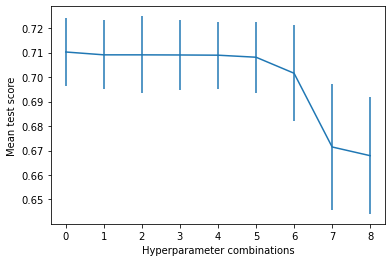

In [10]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], 
                                      results['std_test_score']],subplots=True)
plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [11]:
# Now let's get the performance on train and test

X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]

print('Train score: ', roc_auc_score(y_train, X_train_preds))
print('Test score: ', roc_auc_score(y_test, X_test_preds))

Train score:  0.7205752416935851
Test score:  0.7451726922794543


In [12]:
# evaluate on single parameters
def summ_by_para(hpara):
    tmp = pd.concat([
        results.groupby(hpara)['mean_test_score'].mean(),
        results.groupby(hpara)['mean_test_score'].std(),
    ], axis=1)
    
    tmp.columns = ['mean_test_score','std_test_score']
    
    return tmp

In [13]:
tmp = summ_by_para('param_C')

tmp.head()

,mean_test_score,std_test_score
param_C,,
0.1,0.683210,0.023499
1.0,0.706598,0.004340
10.0,0.708714,0.000507


Text(0, 0.5, 'roc_auc')

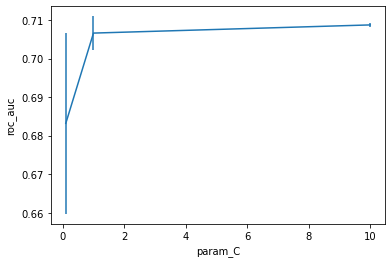

In [14]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']],
                           subplots=True)
plt.ylabel('roc_auc')

Text(0, 0.5, 'roc_auc')

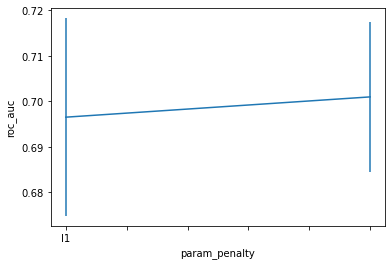

In [15]:
tmp = summ_by_para('param_penalty')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'],tmp['std_test_score']],
                           subplots=True)
plt.ylabel('roc_auc')

In [16]:
logit = LogisticRegression(max_iter=10000,)

param_grid = dict(C = [10,15,20,30,40],
                 tol= [0.0001,0.001,0.01,0.01])

stf = StratifiedKFold(n_splits=5,shuffle=True)

clf = GridSearchCV(logit, param_grid,
                  scoring='roc_auc',
                  cv=stf, refit=True, # refits best model to entire df
                  )

search = clf.fit(X_train,y_train)

search.best_params_

{'C': 15, 'tol': 0.0001}

In [17]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]

print('Train score: ', roc_auc_score(y_train, X_train_preds))
print('Test score: ', roc_auc_score(y_test, X_test_preds))

Train score:  0.7203788939522036
Test score:  0.7469295071478768
